In [1]:
import pandas as pd

In [2]:


# Specify encoding when reading the CSV file
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='latin1')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
df.dropna(inplace=True)  # Menghapus baris dengan nilai kosong


In [7]:
# Drop fitur yang tidak diperlukan
df.drop(['Country', 'InvoiceNo'], axis=1, inplace=True)


In [8]:
df.head()


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only the 'Quantity' and 'UnitPrice' features
df[['Quantity', 'UnitPrice']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])


In [10]:
df.drop(['StockCode'], axis=1, inplace=True)

In [11]:
df.drop(['Description'], axis=1, inplace=True)


In [12]:

df.drop(['InvoiceDate'], axis=1, inplace=True)

In [13]:
df.head()

,Quantity,UnitPrice,CustomerID
0,-0.024373,-0.013135,17850.0
1,-0.024373,-0.001017,17850.0
2,-0.016331,-0.010250,17850.0
3,-0.024373,-0.001017,17850.0
4,-0.024373,-0.001017,17850.0


In [14]:
from sklearn.cluster import KMeans

# Pemilihan fitur
X = df[['Quantity', 'UnitPrice']]

# Pemilihan jumlah cluster (contoh menggunakan elbow method)
clusters = []
for i in range(1, 11):
    km = KMeans (n_clusters=i).fit(df)
    clusters.append(km.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Inertia')

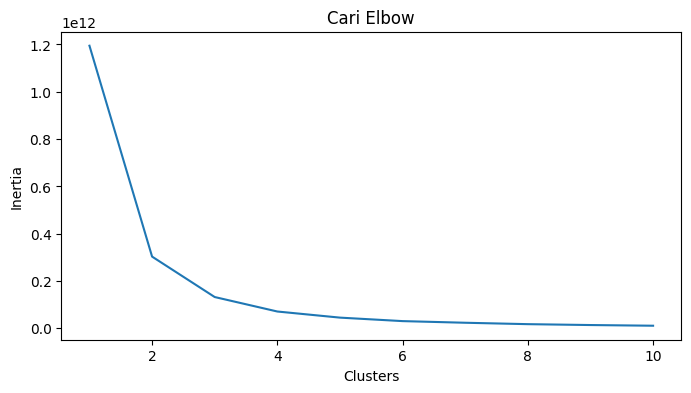

In [15]:
# Visualisasi elbow method
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Buat Plot Inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)

ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_18/3435842960.py:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x=X['Quantity'], y=X['UnitPrice'], hue=X['Label'],


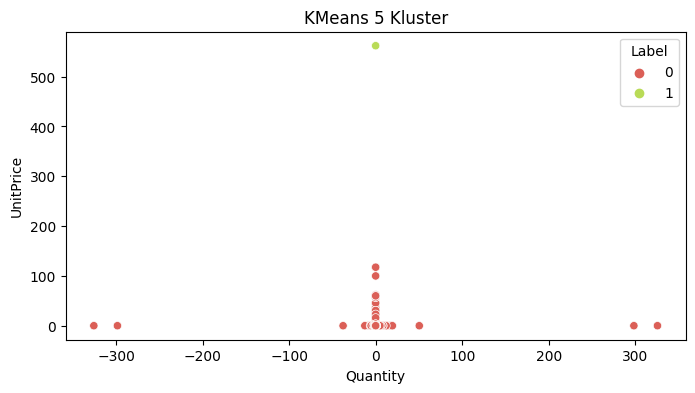

In [16]:
# Terapkan KMeans dengan jumlah cluster yang telah ditentukan
# Kemudian lakukan fitting model KMeans
#X = df[['Quantity', 'UnitPrice', 'CustomerID']]
km5 = KMeans(n_clusters=2).fit(X)

# Tambahkan kolom label pada dataset
X['Label'] = km5.labels_

# Sekarang plot KMeans dapat dilakukan
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['Quantity'], y=X['UnitPrice'], hue=X['Label'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans 5 Kluster')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()